<a href="https://colab.research.google.com/github/ranajay531/DigitClassifier/blob/main/DigitClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras import Input
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, AveragePooling2D
import cv2

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
# Importing dataset
training_data, testing_data = keras.datasets.mnist.load_data()

# Checking data shapes
print(f'Training Data Shape: {training_data[0].shape}')
print(f'Testing Data Shape: {testing_data[0].shape}')

Training Data Shape: (60000, 28, 28)
Testing Data Shape: (10000, 28, 28)


Image Label: 2


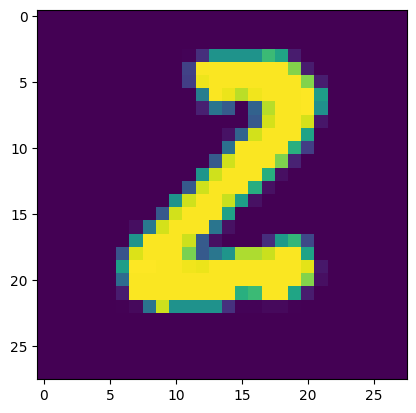

In [51]:
# Viewing random image
random_index = np.random.randint(low=0,high=training_data[0].shape[0],size=1,dtype=int) # Getting a random index
random_example = np.squeeze(training_data[0][random_index],axis=0) # Getting the random example

# Plotting the image
plt.imshow(random_example)
print(f'Image Label: {training_data[1][random_index][0]}')
plt.show()

In [52]:
train_x = training_data[0] / 255.0
train_y = training_data[1]

test_x = testing_data[0] / 255.0
test_y = testing_data[1]

In [53]:
train_y = keras.utils.to_categorical(train_y,num_classes=10)
test_y = keras.utils.to_categorical(test_y,num_classes=10)

In [54]:
# Building the model
model = Sequential()

model.add(Input(shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(AveragePooling2D(pool_size=2))
model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(AveragePooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

In [55]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 average_pooling2d_6 (Avera  (None, 13, 13, 32)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 average_pooling2d_7 (Avera  (None, 5, 5, 64)          0         
 gePooling2D)                                                    
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_3 (Dense)             (None, 10)               

In [56]:
loss_function = 'categorical_crossentropy'
optimizer = keras.optimizers.SGD(learning_rate=0.005)
metrics = ['accuracy']
model.compile(optimizer=optimizer,loss=loss_function,metrics=metrics)

In [57]:
train_x = np.expand_dims(train_x,axis=3)
train_x.shape

(60000, 28, 28, 1)

In [58]:
history = model.fit(x=train_x,y=train_y,batch_size=32,epochs=20,shuffle=True)


Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0047 - accuracy: 0.7375
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3794 - accuracy: 0.8887
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3307 - accuracy: 0.9035
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2842 - accuracy: 0.9177
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2405 - accuracy: 0.9316
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2042 - accuracy: 0.9415
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1772 - accuracy: 0.9494
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1562 - accuracy: 0.9555
Epoch 9/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1410 - accuracy: 0.9601
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.129

Image Label: 6


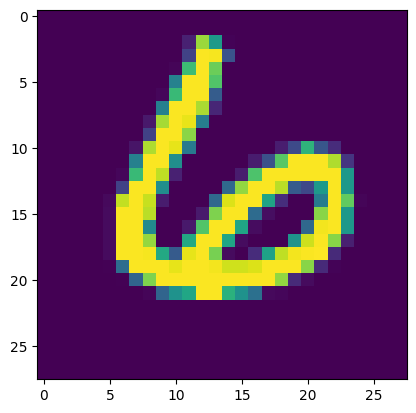

In [59]:
# Seeing how the model does on a single example in the test set
# Taking look at a random image
random_index = np.random.randint(low=0,high=testing_data[0].shape[0],size=1,dtype=int) # Getting a random index
random_example = np.squeeze(testing_data[0][random_index],axis=0) # Getting the random example

# Plotting the image
plt.imshow(random_example)
print(f'Image Label: {testing_data[1][random_index][0]}')
plt.show()

In [60]:
# Making prediction on test example
prediction = model.predict(random_example.reshape(1,28,28,1))
print(f'Actual: {testing_data[1][random_index][0]}')
print(f'Model Prediction: {np.argmax(prediction)}')

1/1 [==============================] - 0s 82ms/step
Actual: 6
Model Prediction: 6


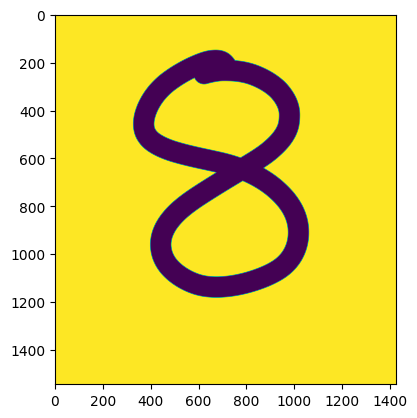

In [89]:
image_path = '/content/drive/MyDrive/num8.PNG'
handwritten_image = cv2.imread(image_path,0)
plt.imshow(handwritten_image)
plt.show()

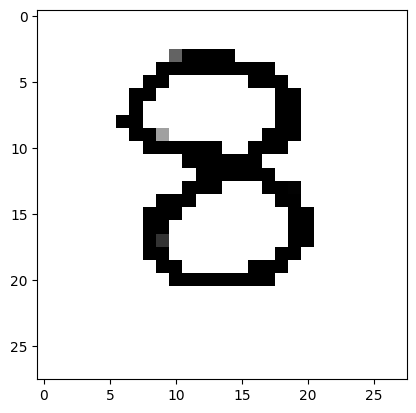

In [90]:
handwritten_image = cv2.resize(handwritten_image,(28,28))
plt.imshow(handwritten_image,cmap='gray')
plt.show()

In [91]:
handwritten_image_array=np.array(handwritten_image)
handwritten_image_array=handwritten_image_array.astype('float32')
handwritten_image_array=handwritten_image_array / 255.0
handwritten_image_array=handwritten_image_array.reshape(1,28,28,1)
handwritten_image_array.shape

(1, 28, 28, 1)

In [92]:
prediction = model.predict(handwritten_image_array)
print(f'Actual: {8}')
print(f'Model Prediction: {np.argmax(prediction)}')

1/1 [==============================] - 0s 23ms/step
Actual: 8
Model Prediction: 8
